In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#!pip install chromadb
#!pip install sentence-transformers
#!pip install langchain openai

In [17]:
import matplotlib.pyplot as plt

In [3]:
import os, sys
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

import chroma as utils

In [4]:
file_path = './pdfs/RaptorContract.pdf'
pdftexts = utils.pdf_reader(file_path)
pdftexts[0]

'[R&G\nDraft\n12.__.2021]\nSTOCK\nPURCHASE\nAGREEMENT\nBY\nAND\nAMONG\n[BUYER],\n[TARGET\nCOMP ANY],\nTHE\nSELLERS\nLISTED\nON\nSCHEDULE\nI\nHERET O\nAND\nTHE\nSELLERS’\nREPRESENT ATIVE\nNAMED\nHEREIN\nDated\nas\nof\n[●]\n[This\ndocument\nis\nintended\nsolely\nto\nfacilitate\ndiscussions\namong\nthe\nparties\nidentified\nherein. \nNeither\nthis\ndocument\nnor\nsuch\ndiscussions\nare\nintended\nto\ncreate,\nnor\nwill\neither\nor\nboth\nbe \ndeemed\nto\ncreate,\na\nlegally\nbinding\nor\nenforceable\noffer\nor\nagreement\nof\nany\ntype\nor\nnature, \nunless\nand\nuntil\na\ndefinitive\nwritten\nagreement\nis\nexecuted\nand\ndelivered\nby\neach\nof\nthe\nparties \nhereto.\nThis\ndocument\nshall\nbe\nkept\nconfidential\npursuant\nto\nthe\nterms\nof\nthe\nConfidentiality \nAgreement\nentered\ninto\nby\nthe\nparties\nand,\nif\napplicable,\nits\naffiliates\nwith\nrespect\nto\nthe\nsubject \nmatter\nhereof.]\n112923184_5'

In [5]:
character_split_texts = utils.text_splitter_chunks(pdftexts)
print(character_split_texts[10])
print(f"\nTotal chunks: {len(character_split_texts)}")

assessment,
hearing,
complaint,
charge, 
demand
or
other
legal
proceeding
(whether
sounding
in
contract,
tort
or
otherwise,
whether
civil 
or
criminal
and
whether
brought
at
law
or
in
equity)
that
is
commenced,
brought,
conducted, 
tried
or
heard
by
or
before,
or
otherwise
involving,
any
Governmental
Authority .
“
Affiliate
”
means,
with
respect
to
any
specified
Person,
any
other
Person
directly
or 
indirectly
controlling,
controlled
by,
or
under
direct
or
indirect
common
control
with
such 
specified
Person.
For
purposes
of
the
foregoing,
a
Person
shall
be
deemed
to
control
a
specified 
Person
if
such
Person
(or
a
Family
Member
of
such
Person)
possesses,
directly
or
indirectly ,
the 
power
to
direct
or
cause
the
direction
of
the
management
and
policies
of
such
specified
Person.
“
Ancillary
Agreements
”
means
the
Escrow
Agreement,
the
Option
Cancellation 
Acknowledgments,
and
[and
the
Employment
Agreements].
“
Anti-Corruption
Laws
”
means
any
applicable
laws,
regulations,
or
orders

Tot

In [6]:
token_split_texts = utils.sentence_transfomer_textsplitter(character_split_texts)
print(token_split_texts[10])
print(f"\nTotal chunks: {len(token_split_texts)}")

assessment, hearing, complaint, charge, demand or other legal proceeding ( whether sounding in contract, tort or otherwise, whether civil or criminal and whether brought at law or in equity ) that is commenced, brought, conducted, tried or heard by or before, or otherwise involving, any governmental authority. “ affiliate ” means, with respect to any specified person, any other person directly or indirectly controlling, controlled by, or under direct or indirect common control with such specified person. for purposes of the foregoing, a person shall be deemed to control a specified person if such person ( or a family member of such person ) possesses, directly or indirectly, the power to direct or cause the direction of the management and policies of such specified person. “ ancillary agreements ” means the escrow agreement, the option cancellation acknowledgments, and [ and the employment agreements ]. “ anti - corruption laws ” means any applicable laws, regulations, or orders

Total

In [7]:
embedding_function = utils.embedding(token_split_texts)
print(embedding_function([token_split_texts[10]]))

[[-0.06615418940782547, 0.021851660683751106, -0.04949655383825302, -0.0374758318066597, -0.08779996633529663, 0.008753098547458649, 0.05329490453004837, -0.005156132858246565, 0.004735790193080902, -0.0007585635175928473, 0.13133034110069275, -0.0016952813602983952, 0.05872916802763939, -0.01360852736979723, -0.015575147233903408, 0.03788156807422638, 0.028920229524374008, 0.042897194623947144, -0.0682736337184906, 0.022076740860939026, -0.0034120571799576283, -0.0065629431046545506, -0.055781688541173935, 0.033138711005449295, -0.023728584870696068, -0.06766857951879501, -0.008463636972010136, -0.015746697783470154, 0.014574321918189526, -0.10380741208791733, 0.028490601107478142, -0.00010456102609168738, 0.07616795599460602, 0.05056091770529747, 0.006583708338439465, 0.013056857511401176, 0.0192567165941, -0.04991207271814346, -0.01696736365556717, -0.01379402820020914, 0.057100873440504074, -0.023896735161542892, -0.05405914783477783, -0.09256928414106369, -0.04631205275654793, -0.

In [8]:
chroma_collection = utils.connect_with_chromadb(embedding_function, token_split_texts)
chroma_collection.count()

259

In [9]:
query = "Under what circumstances and to what extent the Sellers are responsible for a breach of representations and warranties?"
retrieved_documents = utils.vectordb_answer_question(query, chroma_collection)
for document in retrieved_documents:
        print(document)
        print('\n')

sellers ’ representative ’ s gross negligence, bad faith or willful misconduct. the sellers ’ representative is serving in its capacity as such solely for purposes of administrative convenience, and is not personally liable in such capacity for any of the obligations of the sellers hereunder, and the buyer agrees that it will not look to the personal assets of the sellers ’ representative, acting in such capacity, for the satisfaction of any obligations to be performed by the sellers hereunder. - 62 - 112923184 _ 5


under this agreement or the escrow agreement. ( d ) liability. the sellers ’ representative shall not be held liable by any of the sellers for actions or omissions in exercising or failing to exercise all or any of the power and authority of the sellers ’ representative pursuant to this agreement, except in the case of the sellers ’ representative ’ s gross negligence, bad faith or willful misconduct. the sellers ’ representative shall be entitled to rely on the advice of 

In [10]:
output_answer = utils.openai_model_answer(query=query, retrieved_documents=retrieved_documents)
print(output_answer)

The Sellers' representative will be responsible for a breach of representations and warranties if they engage in gross negligence, bad faith, or willful misconduct. In such cases, the Sellers' representative may be held liable, but they will not be personally liable for any obligations of the Sellers under the agreement. The Sellers' representative can rely on advice from experts and will not be held liable for actions taken or omitted in good faith based on such advice, except in cases of gross negligence, bad faith, or willful misconduct. Each Seller will indemnify the Sellers' representative for losses arising from their role as the representative, except for losses caused by the representative's own gross negligence, bad faith, or willful misconduct.


In [11]:
# !pip install umap-learn

In [13]:
import umap
import numpy as np
from tqdm import tqdm

embeddings = chroma_collection.get(include=['embeddings'])['embeddings']
umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)

In [14]:
def project_embeddings(embeddings, umap_transform):
    umap_embeddings = np.empty((len(embeddings),2))
    for i, embedding in enumerate(tqdm(embeddings)): 
        umap_embeddings[i] = umap_transform.transform([embedding])
    return umap_embeddings   

In [15]:
projected_dataset_embeddings = project_embeddings(embeddings, umap_transform)

100%|██████████| 259/259 [10:08<00:00,  2.35s/it]


(2.186371958255768, 9.635115706920624, -3.7563799738883974, 3.1776419997215273)

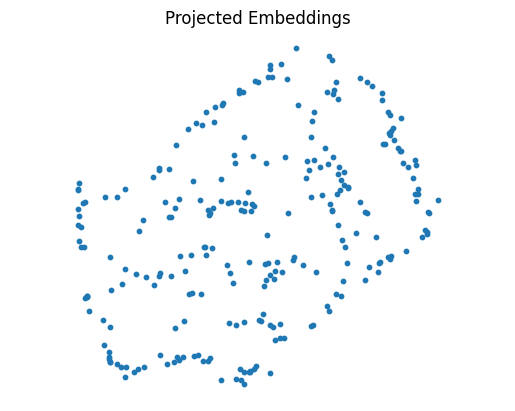

In [16]:
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Projected Embeddings')
plt.axis('off')

Relevancy and Distraction

In [32]:
query = "Under what circumstances and to what extent the Sellers are responsible for a breach of representations and warranties?"

results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

sellers ’ representative ’ s gross negligence, bad faith or willful misconduct. the sellers ’ representative is serving in its capacity as such solely for purposes of administrative convenience, and is not personally liable in such capacity for any of the obligations of the sellers hereunder, and the buyer agrees that it will not look to the personal assets of the sellers ’ representative, acting in such capacity, for the satisfaction of any obligations to be performed by the sellers hereunder. - 62 - 112923184 _ 5

under this agreement or the escrow agreement. ( d ) liability. the sellers ’ representative shall not be held liable by any of the sellers for actions or omissions in exercising or failing to exercise all or any of the power and authority of the sellers ’ representative pursuant to this agreement, except in the case of the sellers ’ representative ’ s gross negligence, bad faith or willful misconduct. the sellers ’ representative shall be entitled to rely on the advice of c

In [33]:
output_answer = utils.openai_model_answer(query=query, retrieved_documents=retrieved_documents)
print(output_answer)

The Sellers' representative shall not be held liable by any of the Sellers for actions or omissions except in the case of gross negligence, bad faith, or willful misconduct. The Sellers' representative is not personally liable for any of the obligations of the Sellers under the agreement. Each Seller will severally indemnify the Sellers' representative from any losses arising out of its role as the Sellers' representative. The Sellers' representative will be entitled to rely on advice from experts in the matter and will not be liable for actions taken in good faith based on such advice. These provisions limit the extent of the Sellers' responsibility for a breach of representations and warranties involving the Sellers' representative.


In [19]:
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)

100%|██████████| 5/5 [00:08<00:00,  1.74s/it]


(2.186371958255768, 9.635115706920624, -3.7563799738883974, 3.1776419997215273)

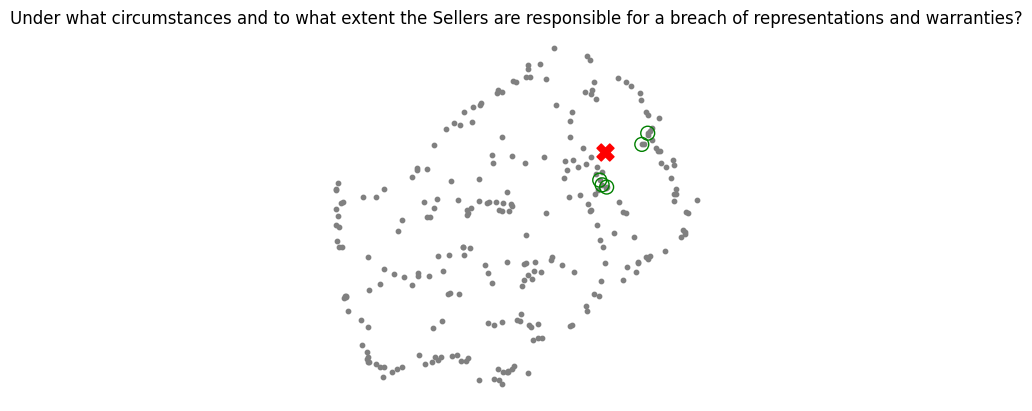

In [20]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

In [34]:
query = "How much is the escrow amount in value number?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

with the escrow agreement. the escrow amount shall be held and, subject to section 2. 07, released to the company securityholders in accordance with the provisions of the escrow agreement with the company securityholders being entitled to share in such released amounts in accordance with their pro rata percentages. from and after the closing, buyer and the sellers ’ representative will direct the escrow agent to disburse payments from the escrow account in accordance with the purchase price adjustment provisions of this agreement and the terms of the escrow agreement including : ( a ) in the case of any disbursement that is required by the terms of this agreement and as to which there is no dispute ( or as to which the disputing party has failed to notify the escrow agent and the other parties of its dispute in accordance with any applicable requirements under this agreement and the escrow agreement ), they will provide prompt joint payment instructions directing the escrow agent

secu

In [35]:
output_answer = utils.openai_model_answer(query=query, retrieved_documents=retrieved_documents)
print(output_answer)

The escrow amount is $1,000,000.


In [24]:
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)

100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


(2.186371958255768, 9.635115706920624, -3.7563799738883974, 3.1776419997215273)

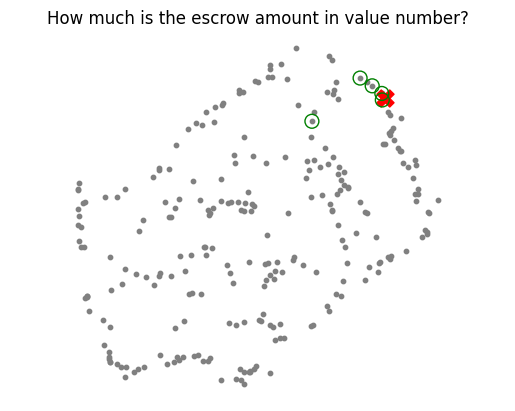

In [25]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

In [36]:
query = "How much is the escrow amount?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

with the escrow agreement. the escrow amount shall be held and, subject to section 2. 07, released to the company securityholders in accordance with the provisions of the escrow agreement with the company securityholders being entitled to share in such released amounts in accordance with their pro rata percentages. from and after the closing, buyer and the sellers ’ representative will direct the escrow agent to disburse payments from the escrow account in accordance with the purchase price adjustment provisions of this agreement and the terms of the escrow agreement including : ( a ) in the case of any disbursement that is required by the terms of this agreement and as to which there is no dispute ( or as to which the disputing party has failed to notify the escrow agent and the other parties of its dispute in accordance with any applicable requirements under this agreement and the escrow agreement ), they will provide prompt joint payment instructions directing the escrow agent

the 

In [37]:
output_answer = utils.openai_model_answer(query=query, retrieved_documents=retrieved_documents)
print(output_answer)

The escrow amount will be held in escrow and will be available solely for the purpose of satisfying obligations of the company securityholders, as provided in section 2.07(f) of the escrow agreement.


In [27]:
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)

100%|██████████| 5/5 [00:10<00:00,  2.04s/it]


(2.186371958255768, 9.635115706920624, -3.7563799738883974, 3.1776419997215273)

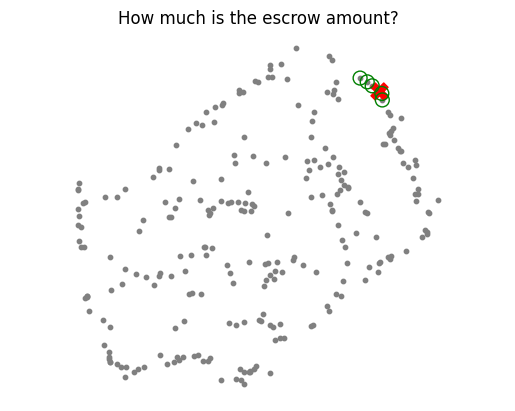

In [28]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

In [38]:
query = "Are there any conditions to the closing?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

recitals proposed final closing statement 2. 07 ( c ) purchase price 2. 02 real property 3. 10 ( a ) real property leases 3. 10 ( a ) releasees 6. 07 ( a ) releasing parties 6. 07 ( a ) restricted period 6. 08 ( a ) restrictive covenant agreement recitals scheduled intellectual property rights 3. 11 ( c ) section 14 arrangement 3. 19 ( a ) securities recitals - 14 - 112923184 _ 5

adjustments contemplated in this agreement, is referred to herein as the “ purchase price ”. section ii. 03 the closing. the purchase and sale of the shares ( the “ closing ” ) shall take place on the date hereof ( the “ closing date ” ) by exchange of documents and signatures ( or their electronic counterparts ). the consummation of the transactions contemplated by this agreement shall be deemed to occur at 12 : 01 a. m. pacific standard time on the closing date. section ii. 04 closing payments. ( a ) at the closing, buyer shall pay, or cause to be paid, through payment to the paying agent which will in turn

In [39]:
output_answer = utils.openai_model_answer(query=query, retrieved_documents=retrieved_documents)
print(output_answer)

Based on the information provided in the annual report, the conditions to the closing include the agreement that the final closing statement shall be final, conclusive, and binding on the parties unless the sellers' representative provides a written dispute notice to the buyer no later than the thirtieth (30th) business day after the delivery of the proposed final closing statement. Any dispute notice must set forth in reasonable detail any item on the proposed final closing statement believed to have not been prepared in agreement, and the decision of the accounting firm will be referred to as the "final closing statement."


In [30]:
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)

100%|██████████| 5/5 [00:07<00:00,  1.58s/it]


(2.186371958255768, 9.635115706920624, -3.7563799738883974, 3.1776419997215273)

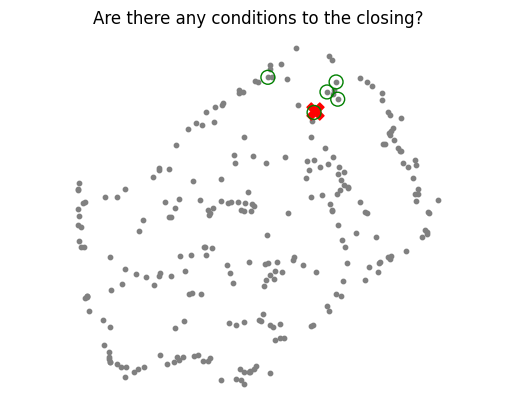

In [31]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')